### Optimised Algorithim


In [1]:
from BasicGaAlgorithim import (
                                generate_population,
                                fitness_function,
                                mutation,
                                check_for_perfect_genotype,
                                calculate_perfect_score
                            )

from OptimiseGaAlgorithim import (
                                crossover,
                                selection,
                                elitism,
                                remove_parent_pairs
)

In [66]:
def generation(
            population,
            size_of_population, 
            number_of_queens,
            mutation_frequency,
            tournament_population_size,
            elitism_ratio
        ):
        
    # b) fitness function
    fit_scores = [fitness_function(genotype) for genotype in population]

    # c) selection
    selected_pairs = selection(population, size_of_population, tournament_population_size)
    # make room for elites
    remove_selected_pairs = remove_parent_pairs(selected_pairs, elitism_ratio, size_of_population)
    
    # d) cross over
    children = crossover(remove_selected_pairs, number_of_queens)

    ##ELITISM
    elites = elitism(population, fit_scores, elitism_ratio, size_of_population)
    elite_children = elites + children

    fit_scores = [fitness_function(genotype) for genotype in elite_children]

    # e) mutation
    mutated = mutation(elite_children, mutation_frequency, number_of_queens)

    return mutated


population = generate_population(
    size_of_population=8,
    number_of_queens=8
)

generation(
            population=population,
            size_of_population=8, 
            number_of_queens=8, 
            mutation_frequency=8, 
            tournament_population_size=5, 
            elitism_ratio=0.25
    )

[[3, 2, 4, 1, 1, 4, 7, 6],
 [0, 0, 2, 4, 6, 2, 5, 2],
 [2, 2, 4, 1, 2, 4, 2, 6],
 [0, 3, 2, 3, 0, 3, 5, 2],
 [3, 2, 4, 4, 7, 2, 5, 6],
 [0, 0, 2, 4, 6, 2, 7, 2],
 [1, 4, 1, 1, 2, 5, 2, 6],
 [5, 5, 2, 2, 2, 5, 2, 6]]

In [67]:
import timeit

NUMBER_OF_QUEENS=8
SIZE_OF_POPULATION=25
MUTATION_FREQUENCY = 8
PERFECT_SCORE = calculate_perfect_score(NUMBER_OF_QUEENS)
TOURNAMENT_POPULATION_SIZE = 5
ELITISM_RATIO = 0.25


def genetic_algorithm(population):

    start_time = timeit.default_timer()

    gen = 0
    completed_genotype = []

    # # g) check if it has found correct state and exit loop
    while not completed_genotype:
        population = generation(
            population=population,
            size_of_population=SIZE_OF_POPULATION, 
            number_of_queens=NUMBER_OF_QUEENS, 
            mutation_frequency=MUTATION_FREQUENCY, 
            tournament_population_size=TOURNAMENT_POPULATION_SIZE,
            elitism_ratio=ELITISM_RATIO,
        )
        completed_genotype = check_for_perfect_genotype(population, PERFECT_SCORE)
        gen += 1

        if gen == 100000:
            break

    stop_time = timeit.default_timer()

    return {
        "elapsed_time": stop_time - start_time,
        "number_of_generations": gen,
        "completed_state": completed_genotype
    }

# a) generate initial population
population = generate_population(NUMBER_OF_QUEENS, SIZE_OF_POPULATION)

ga_result = genetic_algorithm(population)

ga_result

{'elapsed_time': 0.10971719999997731,
 'number_of_generations': 18,
 'completed_state': [3, 7, 0, 4, 6, 1, 5, 2]}

In [68]:
# run algo on all test populations

import pickle

test_populations_name = 'testpopulations\\test_populations_1000'

with open(test_populations_name, 'rb') as f:
    test_population = pickle.load(f)

results = {
        "elapsed_time": [],
        "number_of_generations": [],
        "completed_state": []
}

for pop in test_population:

        ga_result = genetic_algorithm(population)

        results["elapsed_time"].append(ga_result["elapsed_time"])
        results["number_of_generations"].append(ga_result["number_of_generations"])
        results["completed_state"].append(ga_result["completed_state"])

        print(f"elapsed_time:")
        print(ga_result["elapsed_time"])
        print(f"number_of_generations:")
        print(ga_result["number_of_generations"])
        print(f"completed_state:")
        print(ga_result["completed_state"])
        print("=========================")

elapsed_time:
0.062412899999799265
number_of_generations:
10
completed_state:
[2, 0, 6, 4, 7, 1, 3, 5]
elapsed_time:
0.11959840000008626
number_of_generations:
20
completed_state:
[5, 3, 0, 4, 7, 1, 6, 2]
elapsed_time:
0.19551070000034088
number_of_generations:
26
completed_state:
[5, 2, 6, 1, 7, 4, 0, 3]
elapsed_time:
0.4893028999999842
number_of_generations:
73
completed_state:
[5, 2, 6, 1, 7, 4, 0, 3]
elapsed_time:
1.7947076999998899
number_of_generations:
281
completed_state:
[5, 2, 4, 6, 0, 3, 1, 7]
elapsed_time:
8.04668300000003
number_of_generations:
1085
completed_state:
[5, 3, 6, 0, 7, 1, 4, 2]
elapsed_time:
0.18323300000020026
number_of_generations:
13
completed_state:
[7, 1, 3, 0, 6, 4, 2, 5]
elapsed_time:
0.7353742999998758
number_of_generations:
134
completed_state:
[1, 4, 6, 0, 2, 7, 5, 3]
elapsed_time:
0.1509595999996236
number_of_generations:
31
completed_state:
[5, 2, 6, 1, 7, 4, 0, 3]
elapsed_time:
0.3794539000000441
number_of_generations:
72
completed_state:
[4, 1, 3

In [69]:

from TestHelper import generate_test_population

# generate_test_population("test_populations_1000", 8, 1000, 100)

for completed_state in results["completed_state"]:

    if fitness_function(completed_state) < 28:
        print(completed_state)


    elapsed_time  number_of_generations           completed_state
0       0.062413                     10  [2, 0, 6, 4, 7, 1, 3, 5]
1       0.119598                     20  [5, 3, 0, 4, 7, 1, 6, 2]
2       0.195511                     26  [5, 2, 6, 1, 7, 4, 0, 3]
3       0.489303                     73  [5, 2, 6, 1, 7, 4, 0, 3]
4       1.794708                    281  [5, 2, 4, 6, 0, 3, 1, 7]
..           ...                    ...                       ...
95      2.462846                    432  [2, 7, 3, 6, 0, 5, 1, 4]
96      1.759140                    241  [1, 6, 2, 5, 7, 4, 0, 3]
97      1.912057                    288  [2, 4, 7, 3, 0, 6, 1, 5]
98      0.794924                     91  [6, 3, 1, 7, 5, 0, 2, 4]
99      0.454978                     55  [0, 6, 3, 5, 7, 1, 4, 2]

[100 rows x 3 columns]
mean_number_of_generations: 154.23
std_number_of_generations: 169.170277913388
number_of_generation_range: 1079
mean_elapsed_time: 1.0155284040000105
std_elapsed_time: 1.12063317017424

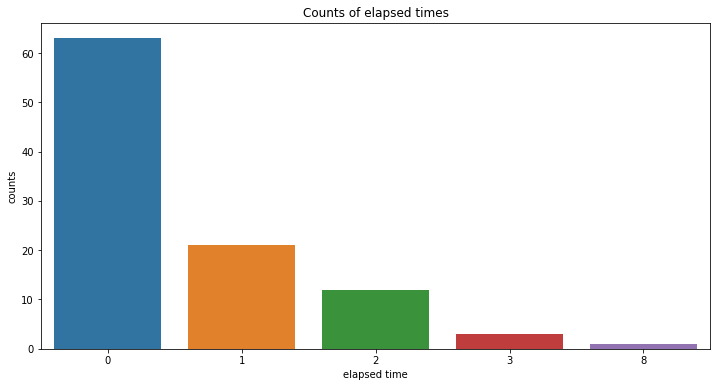

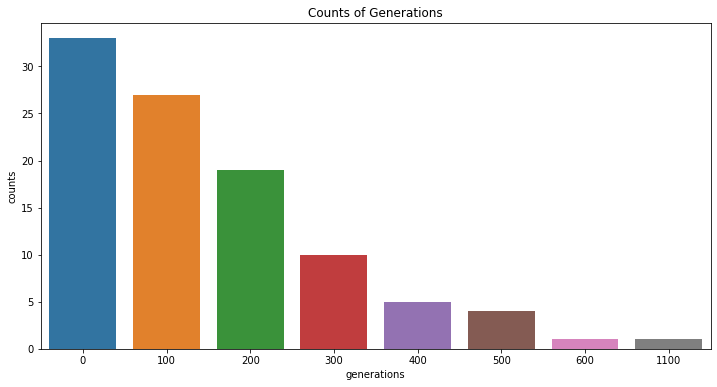

In [70]:
import os

unique_identifier = "100_1000-2_population"
parent_directory = "C:\\Users\\SAB68\\repos\\samsambutdifferent\\eight-queen-problem\\results\\optimise"

path = os.path.join(parent_directory, unique_identifier)

if not os.path.exists(path):
    os.mkdir(path)

config = {
    "NUMBER_OF_QUEENS": NUMBER_OF_QUEENS,
    "SIZE_OF_POPULATION": SIZE_OF_POPULATION,
    "MUTATION_FREQUENCY": MUTATION_FREQUENCY,
    "PERFECT_SCORE": PERFECT_SCORE,
    "test_file": test_populations_name
}

f = open(path + "\\config", "w")

for item in config.items():
    f.writelines(str(item) + '\n')
f.close()


import pandas as pd

results_df = pd.DataFrame(results)

mean_number_of_generations = results_df["number_of_generations"].mean()
mean_elapsed_time = results_df["elapsed_time"].mean()

std_number_of_generations = results_df["number_of_generations"].std()
std_elapsed_time = results_df["elapsed_time"].std()

## range 

et_max = results_df["elapsed_time"].max()
et_min = results_df["elapsed_time"].min()
elapsed_time_range = et_max - et_min

ng_max = results_df["number_of_generations"].max()
ng_min = results_df["number_of_generations"].min()
number_of_generation_range = ng_max - ng_min


print(results_df)

print(f"mean_number_of_generations: {mean_number_of_generations}")
print(f"std_number_of_generations: {std_number_of_generations}")
print(f"number_of_generation_range: {number_of_generation_range}")
print(f"mean_elapsed_time: {mean_elapsed_time}")
print(f"std_elapsed_time: {std_elapsed_time}")
print(f"range_elapsed_time: {elapsed_time_range}")


f = open(path + "\\metrics", "w")
f.writelines(f"mean_number_of_generations: {mean_number_of_generations}" + '\n')
f.writelines(f"std_number_of_generations: {std_number_of_generations}" + '\n')
f.writelines(f"number_of_generation_range: {number_of_generation_range}" + '\n')
f.writelines(f"mean_elapsed_time: {mean_elapsed_time}" + '\n')
f.writelines(f"std_elapsed_time: {std_elapsed_time}" + '\n')
f.writelines(f"range_elapsed_time: {elapsed_time_range}" + '\n')
f.writelines('\n')
f.write(str(results_df))
f.close()


# check all results finish
over_30_seconds = results_df[results_df["elapsed_time"] > 30]
f = open(path + "\\over_30_seconds", "w")
f.write(str(over_30_seconds))
f.close()
print("over_30_seconds")
print(over_30_seconds)


import math

def round_down_to_100(x):
    return round(x, -2) 


floored_elapsed_time = results_df["elapsed_time"].apply(math.floor)
floored_number_of_generations = results_df["number_of_generations"].apply(round_down_to_100)

frame = { 'elapsed_time': floored_elapsed_time, 'number_of_generations': floored_number_of_generations }

floored_results_df = pd.DataFrame(frame)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

fig = sns.barplot(x=floored_results_df.elapsed_time.value_counts().index, y=floored_results_df.elapsed_time.value_counts())

plt.xlabel("elapsed time")
plt.ylabel("counts")
plt.title("Counts of elapsed times")
plt.savefig(path + '/counts_of_elapsed_time.png')
plt.show(fig)

plt.figure(figsize=(12,6))

fig = sns.barplot(x=floored_results_df.number_of_generations.value_counts().index, y=floored_results_df.number_of_generations.value_counts())

plt.xlabel("generations")
plt.ylabel("counts")
plt.title("Counts of Generations")
plt.savefig(path + '/counts_of_generations.png')
plt.show(fig)